In [3]:
from jax import numpy as jnp
from jax.typing import ArrayLike
import matplotlib.pyplot as plt

In [4]:
def heaviside(x: ArrayLike) -> ArrayLike:
    return (x > 0).astype(jnp.int64)

In [8]:
def predict(x: ArrayLike, w: ArrayLike, b: ArrayLike) -> ArrayLike:
    return heaviside(x @ w + b)

In [6]:
x = jnp.linspace(-1, 1, 100)
y = heaviside(x)

<ipython-input-4-313ea672606f>:2: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return (x > 0).astype(jnp.int64)


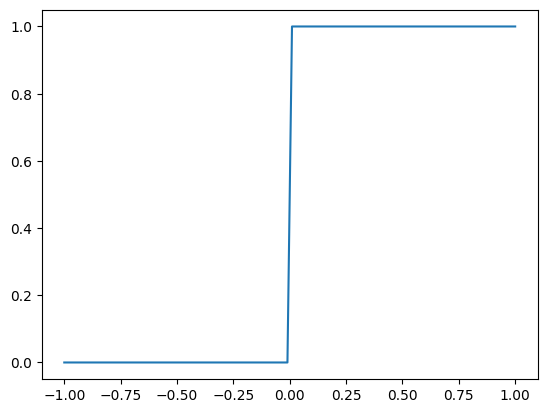

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y)

In [9]:
X = jnp.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1.]
])
display(X)

Array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [10]:
y = jnp.array([0, 0, 0, 1])

In [94]:
w = jnp.array([1., 1.]).reshape(-1, 1)
b = jnp.array([-0.5])

$$
\tilde{y} = H(x_1 \cdot w_1 + x_2 \cdot w_2 + b)
$$

In [95]:
y_pred = predict(X, w, b)

<ipython-input-4-313ea672606f>:2: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return (x > 0).astype(jnp.int64)


In [96]:
y_pred

Array([[0],
       [1],
       [1],
       [1]], dtype=int32)

In [97]:
x_1 = jnp.linspace(0, 1, 100)
x_2 = jnp.linspace(0, 1, 100)
X1, X2 = jnp.meshgrid(x_1, x_2)
X_grid = jnp.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)
y_grid = predict(X_grid, w, b).reshape(X1.shape)

<ipython-input-4-313ea672606f>:2: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return (x > 0).astype(jnp.int64)


In [99]:
y = jnp.array([0, 1, 1, 1])

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$'), (-0.1, 1.1), (-0.1, 1.1)]

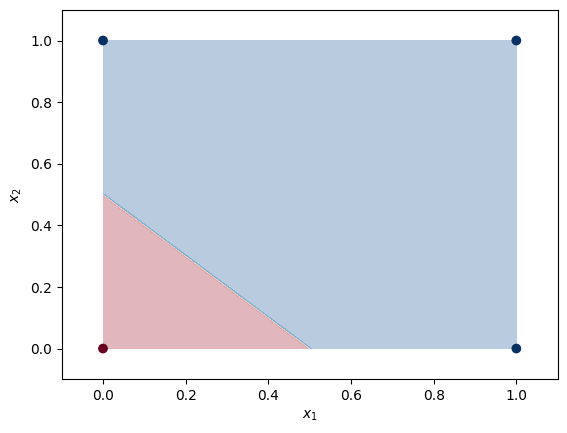

In [100]:
fig, ax = plt.subplots()
ax.contourf(X1, X2, y_grid, cmap="RdBu", alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu")
ax.set(xlabel="$x_1$", ylabel="$x_2$", xlim=[-0.1, 1.1], ylim=[-0.1, 1.1])

In [104]:
def sigmoid(x: ArrayLike) -> ArrayLike:
    return 1 / (1 + jnp.exp(-x))

In [107]:
x = jnp.linspace(-10, 10, 100)
y1 = heaviside(x)
y2 = sigmoid(x)

<ipython-input-4-313ea672606f>:2: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return (x > 0).astype(jnp.int64)


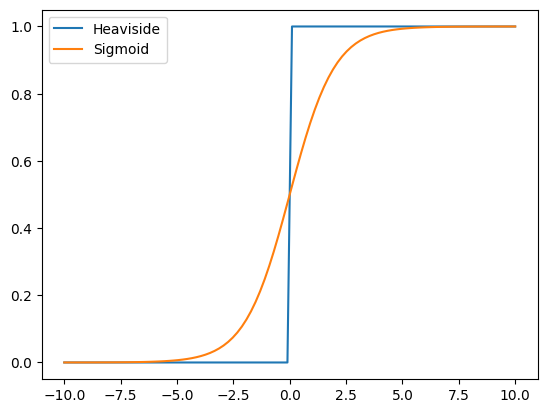

In [108]:
fig, ax = plt.subplots()
ax.plot(x, y1, label="Heaviside")
ax.plot(x, y2, label="Sigmoid")
ax.legend()

$$
H(x) = \left\{\begin{matrix}
        \text{if} & x > 0 & \text{then} & 1 \\
        \text{otherwise} & 0
    \end{matrix}
    \right.
$$

$$
h = f(x \cdot w + b)
$$

- $x$: entrada.
- $w$: pesos, parametros.
- $b$: intercepto, bias.
- $f$: funcion de activacion.
- $h$: salida intermedia.